In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [2]:
df = pd.read_csv('EstateSolarWeather.csv')

df

,Unnamed: 0.1,Unnamed: 0,Date and Time,Location Code,IRR Value W/m²,Energy kWh,Expected Value kWh,PR %,Sensor ID,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C)
0,0,0,2021-04-01,SN2-NAP72-599489,4292.870,228.93,277.64,82.46,DPM-599489-01,0.0,0.0,0.0,0.0,30.1,33.4,27.4
1,1,1,2021-04-02,SN2-NAP72-599489,2875.237,147.24,185.96,79.18,DPM-599489-01,29.4,12.2,14.4,25.8,28.6,35.9,23.7
2,2,2,2021-04-03,SN2-NAP72-599489,4425.905,246.64,286.25,86.16,DPM-599489-01,1.2,0.6,0.6,0.6,27.7,33.6,25.2
3,3,3,2021-04-04,SN2-NAP72-599489,4322.247,221.80,279.54,79.34,DPM-599489-01,13.8,6.4,8.0,11.0,27.7,32.5,23.5
4,4,4,2021-04-05,SN2-NAP72-599489,2445.808,138.26,158.18,87.41,DPM-599489-01,46.8,34.4,43.6,46.0,26.9,32.9,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18856,18856,1815,2024-03-26,SN2-NAP58-599489,5827.338,355.00,403.40,88.00,DPM-599489-16,0.0,0.0,0.0,0.0,29.6,34.4,26.9
18857,18857,1816,2024-03-27,SN2-NAP58-599489,5737.909,348.18,397.21,87.66,DPM-599489-16,0.0,0.0,0.0,0.0,29.8,34.9,26.7
18858,18858,1817,2024-03-28,SN2-NAP58-599489,3548.717,229.85,245.66,89.99,DPM-599489-16,23.4,15.2,23.0,23.4,29.1,33.2,25.8
18859,18859,1818,2024-03-29,SN2-NAP58-599489,5928.919,346.88,410.43,84.52,DPM-599489-16,1.2,1.2,1.2,1.2,29.8,33.7,25.6


In [3]:
# Drop rows where both 'Expected Value kWh' and 'PR %' are 0
df = df[~((df['Expected Value kWh'] == 0) & (df['PR %'] == 0))]

In [4]:
# Ensure df is a copy if it's a slice
df = df.copy()

# Safely create a new column
df.loc[:, 'Energy-kWh'] = df['Expected Value kWh'] * df['PR %'] / 100

<AxesSubplot:xlabel='Date and Time'>

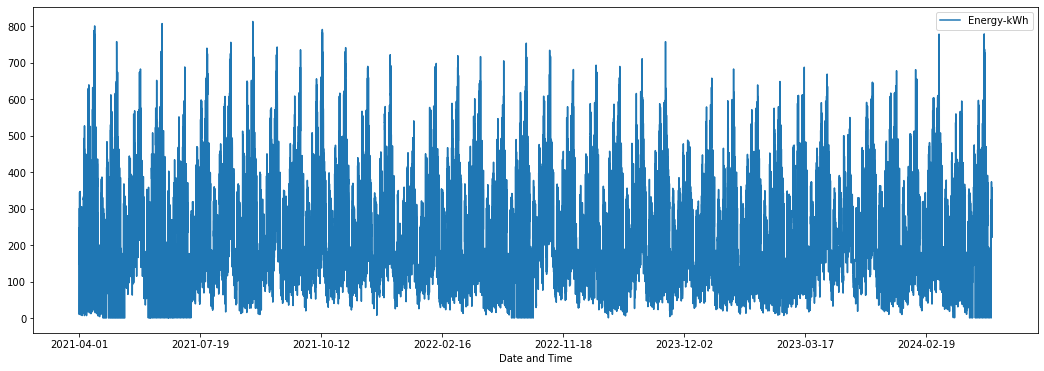

In [5]:
df.plot(x='Date and Time',y='Energy-kWh',figsize=(18,6))

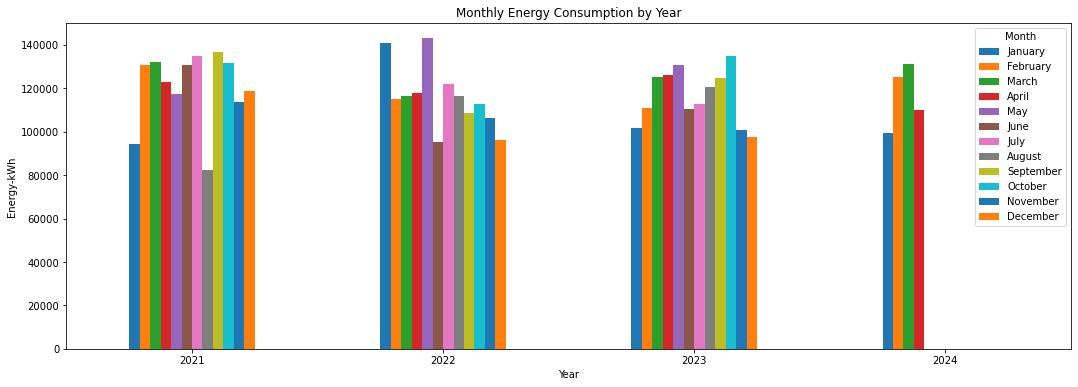

In [6]:
# Ensure 'Date and Time' is of datetime type
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

# Extract year and month name
df['Year'] = df['Date and Time'].dt.year
df['Month'] = df['Date and Time'].dt.strftime('%B')  # Get the month name

# Group by year and month name, then aggregate (sum) 'Energy-kWh'
monthly_data = df.groupby(['Year', 'Month'], sort=False)['Energy-kWh'].sum().reset_index()

# Pivot the table to make it suitable for bar plotting
pivot_table = monthly_data.pivot(index='Year', columns='Month', values='Energy-kWh')

# Ensure the months are in the correct order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
pivot_table = pivot_table[months_order]

# Plot the data
pivot_table.plot(kind='bar', figsize=(18, 6))
plt.title('Monthly Energy Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Energy-kWh')
plt.legend(title='Month')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for better readability
plt.show()

In [7]:
df = df.drop(columns=['Year', 'Month'])

In [8]:
# Ensure 'Date and Time' is of datetime type
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

# Group by 'Date and Time' and sum 'Energy-kWh'
df = df.groupby('Date and Time')['Energy-kWh'].sum().reset_index()

df

,Date and Time,Energy-kWh
0,2021-01-01,0.000000
1,2021-01-02,0.000000
2,2021-01-03,0.000000
3,2021-01-04,2484.920813
4,2021-01-05,4315.029994
...,...,...
1188,2024-04-26,3960.462384
1189,2024-04-27,3742.149840
1190,2024-04-28,3676.793692
1191,2024-04-29,4849.779620


In [9]:
# Prepare the data for Prophet
df.rename(columns={'Date and Time': 'ds', 'Energy-kWh': 'y'}, inplace=True)

In [10]:
# Python
m = Prophet()
m.fit(df)

09:31:03 - cmdstanpy - INFO - Chain [1] start processing
09:31:03 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1553,2025-04-26
1554,2025-04-27
1555,2025-04-28
1556,2025-04-29
1557,2025-04-30


In [12]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#yhat includes the upper and lower predictions for the future dates

,ds,yhat,yhat_lower,yhat_upper
1553,2025-04-26,3894.126642,2078.602120,5744.769430
1554,2025-04-27,3592.874686,1863.591252,5421.606188
1555,2025-04-28,3902.207607,2054.534795,5581.068221
1556,2025-04-29,3944.801400,2293.048843,5625.614798
1557,2025-04-30,3893.530454,2079.395416,5689.057185


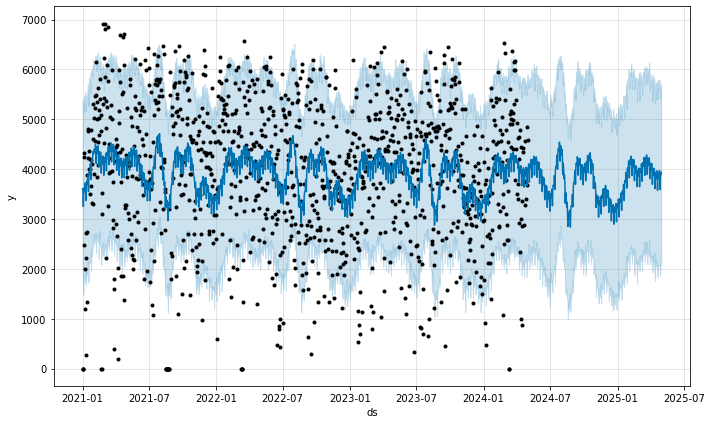

In [13]:
# Python
fig1 = m.plot(forecast)

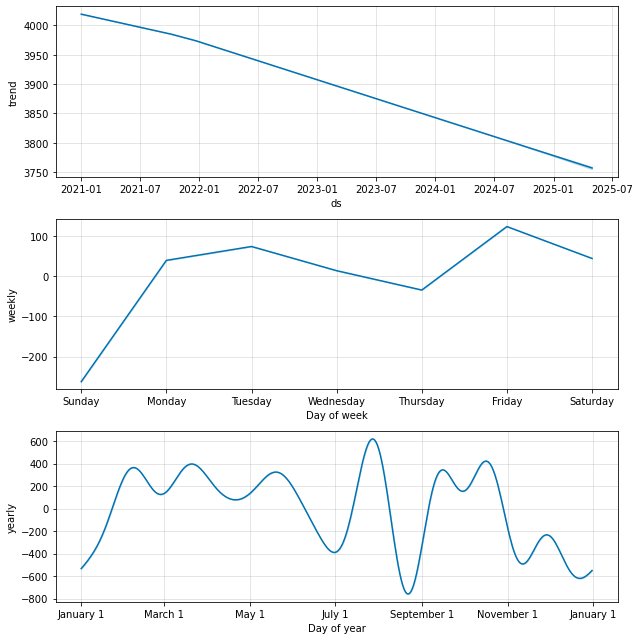

In [14]:
# Python
fig2 = m.plot_components(forecast)

In [15]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
# Python
plot_components_plotly(m, forecast)

In [17]:
import pickle
with open('solar_forecast_prophet.pkl', 'wb') as f:
    pickle.dump(forecast, f)